# Stock Market Prediction

# I. Packages

In [38]:
# read in the packages 

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import utils as ut
from importlib import reload
reload(ut)

<module 'utils' from 'D:\\Bea\\Projects\\github\\stock_price_prediction\\utils.py'>

In [39]:
# set pandas options 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 999)

# II. Data Exploration
## II.1. Selecting a company ticker
Find the ticker symbol for the comany which closing stock price we want to predict <br>

**dataset**: US Stocks & ETFs - Tickers, Company Info, Logos <br>

In this dataset we can search for companies, whose stock price we want to predict. For example, I am going to select a company based on its industry.

In [40]:
# reading in the dataset
df_us_stocks = pd.read_csv('data/companies.csv')
# we won't need this kind of data for finding the ticker we need, so we get rid of them 
df_us_stocks = df_us_stocks.drop(['website', 'logo',  'ceo'], axis = 1)

df_us_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ticker        6368 non-null   object 
 1   company name  6368 non-null   object 
 2   short name    6368 non-null   object 
 3   industry      5418 non-null   object 
 4   description   6207 non-null   object 
 5   exchange      6368 non-null   object 
 6   market cap    6367 non-null   float64
 7   sector        5418 non-null   object 
 8   tag 1         5424 non-null   object 
 9   tag 2         5424 non-null   object 
 10  tag 3         3295 non-null   object 
dtypes: float64(1), object(10)
memory usage: 547.4+ KB


In [41]:
df_us_stocks.sample(5)

,ticker,company name,short name,industry,description,exchange,market cap,sector,tag 1,tag 2,tag 3
804,BSL,Blackstone GSO Senior Floating Rate Term Fund of Beneficial Interest,Blackstone GSO Senior Floating Rate Term Fund of Beneficial Interest,Asset Management,"Blackstone/GSO Senior Floating Rate Trm is a closed-end term fund. Its objective is to seek high current income, with a secondary objective to seek preservation of capital, consistent with its primary goal of high current income.",New York Stock Exchange,2.524090e+08,Financial Services,Financial Services,Asset Management,NaN
554,BBD,Banco Bradesco Sa American Depositary Shares,Banco Bradesco Sa American Depositary Shares,Banks,"Bank Bradesco SA is one of the largest banks in Brazil. The bank provides services through a network of more than 4,700 locations offering insurance and banking facilities like deposits and loans to individuals and business corporations.",New York Stock Exchange,8.293347e+10,Financial Services,Financial Services,Banks - Regional - Latin America,Banks
3943,NFO,Invesco Insider Sentiment,Invesco Insider Sentiment,NaN,"The investment seeks to track the investment results (before fees and expenses) of the Nasdaq US Insider Sentiment Index.\n The fund will invest at least 90% of its total assets in securities that comprise the underlying index and depositary receipts representing common stocks included in the underlying index (or underlying securities representing depositary receipts included in the underlying index). The companies eligible for the underlying index are derived from its starting universe, the Nasdaq US Large Mid Cap Index, which is designed to track the performance of mid- to large-capitalization U.S. companies. The fund is non-diversified.",NYSE Arca,6.849178e+07,NaN,NaN,NaN,NaN
1534,DIG,ProShares Ultra Oil & Gas,ProShares Ultra Oil & Gas,NaN,"The investment seeks daily investment results that correspond to two times (2x) the daily performance of the Dow Jones U.S. Oil & GasSM Index.\n The fund invests in financial instruments that ProShare Advisors believes, in combination, should produce daily returns consistent with the fund's investment objective. The index measures the performance of certain companies in the oil and gas sector of the U.S. equity market. Component companies include, among others, exploration and production, integrated oil and gas, oil equipment and services, pipelines, renewable energy equipment companies and alternative fuel producers. The fund is non-diversified.",NYSE Arca,1.026815e+08,NaN,NaN,NaN,NaN
4919,RUTH,Ruth's Hospitality Group Inc.,Ruth's Hospitality,Restaurants,"Ruth's Hospitality Group Inc operates and franchises approximately 150 fine-dining restaurants under Ruth's Chris Steak House brand in US. The company also has several franchised restaurants in Canada, Mexico, Central America, Asia, and the Middle East.",Nasdaq Global Select,7.126203e+08,Consumer Cyclical,Consumer Cyclical,Restaurants,NaN


In [42]:
# list all industries
df_us_stocks['industry'].unique()

array(['Medical Diagnostics & Research', 'Metals & Mining',
       'Asset Management', 'Health Care Providers', nan, 'Airlines',
       'Insurance - Life', 'Consulting & Outsourcing', 'Semiconductors',
       'Building Materials', 'Retail - Apparel & Specialty',
       'Computer Hardware', 'REITs', 'Transportation & Logistics',
       'Aerospace & Defense', 'Industrial Products', 'Drug Manufacturers',
       'Medical Distribution', 'Banks', 'Biotechnology',
       'Beverages - Alcoholic', 'Autos', 'Communication Equipment',
       'Business Services', 'Medical Devices', 'Brokers & Exchanges',
       'Engineering & Construction', 'Insurance', 'Application Software',
       'Consumer Packaged Goods', 'Credit Services', 'Waste Management',
       'Oil & Gas - Integrated', 'Utilities - Regulated',
       'Insurance - Property & Casualty', 'Farm & Construction Machinery',
       'Agriculture', 'Insurance - Specialty', 'Travel & Leisure',
       'Publishing', 'Homebuilding & Construction',
 

In [43]:
df_us_stocks[df_us_stocks['industry'] == 'Education'].sort_values(by='market cap', ascending=False).head(5)

,ticker,company name,short name,industry,description,exchange,market cap,sector,tag 1,tag 2,tag 3
5468,TAL,TAL Education Group American Depositary Shares,TAL Education American Depositary Shares,Education,"TAL Education Group is engaged in providing after-school tutoring programs for primary and secondary school students in China. It delivers its tutoring services through small classes, personalized premium services, and online course offerings.",New York Stock Exchange,1.799256e+10,Consumer Defensive,Consumer Defensive,Education & Training Services,Education
1723,EDU,New Oriental Education & Technology Group Inc. Sponsored ADR representing 1 (Cayman Islands),New Oriental Education & Technology Sponsored representing 1 (Cayman Islands),Education,"New Oriental Education & Technology Group Inc provides private educational services in China based on the number of program offerings, total student enrollments, and geographic presence.",New York Stock Exchange,1.215739e+10,Consumer Defensive,Consumer Defensive,Education & Training Services,Education
3429,LOPE,Grand Canyon Education Inc.,Grand Canyon Education,Education,"Grand Canyon Education Inc is an American for-profit educational company that operates a private university in Phoenix, Arizona, as well as online educational programs.",Nasdaq Global Select,4.493977e+09,Consumer Defensive,Consumer Defensive,Education & Training Services,Education
1052,CHGG,Chegg Inc.,Chegg,Education,Chegg Inc is a student-first connected learning platform empowering students to take control of their education to save time and money. It offers its products and services under Chegg services and required materials categories.,New York Stock Exchange,4.107588e+09,Consumer Defensive,Consumer Defensive,Education & Training Services,Education
3318,LAUR,Laureate Education Inc.,Laureate Education,Education,Laureate Education Inc is an international community of universities. The company provides higher education programs and services to students through an international network of licensed universities and higher education institutions.,Nasdaq Global Select,3.571212e+09,Consumer Defensive,Consumer Defensive,Education & Training Services,Education


In [44]:
# selecting a company with the highest market cap
selected_company_ticker = 'TAL' #Helmerich & Payne
company_name = df_us_stocks[df_us_stocks['ticker'] == selected_company_ticker].iloc[0]['short name']


# II. 2. Explore the Stock Market Dataset
**dataset:** Huge Stock Market Dataset<br>

Don't forget that there are some days where we have no data - **stock market was closed** on these days.

In [45]:
# Read in the data based on some criteria
zip_file_path = 'data/huge_stock_market_data.zip'
company_ticker = 'hp.us.txt' # company ticker format should be: companyticker.us.txt
date_interval = ['2014-01-01', '2016-12-31']

df_stock_market = ut.read_huge_market_stock_data(zip_file_path, company_ticker, date_interval)
df_stock_market.sample(5)

File is already unzipped


,Date,Open,High,Low,Close,Volume,OpenInt
2584,2015-06-04,64.530,64.947,63.682,63.954,1577896,0
2692,2015-11-05,53.805,54.658,52.391,52.839,2344675,0
2760,2016-02-16,44.420,44.842,43.648,44.742,2772802,0
2556,2015-04-24,65.897,66.362,64.835,65.344,1739473,0
2929,2016-10-14,65.692,65.844,64.498,64.619,857166,0


In [46]:
df_stock_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 2227 to 2982
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     756 non-null    datetime64[ns]
 1   Open     756 non-null    float64       
 2   High     756 non-null    float64       
 3   Low      756 non-null    float64       
 4   Close    756 non-null    float64       
 5   Volume   756 non-null    int64         
 6   OpenInt  756 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 47.2 KB


### II.2.1. Closing Price History
We should take a quick look at the history of the company"s closing price history.

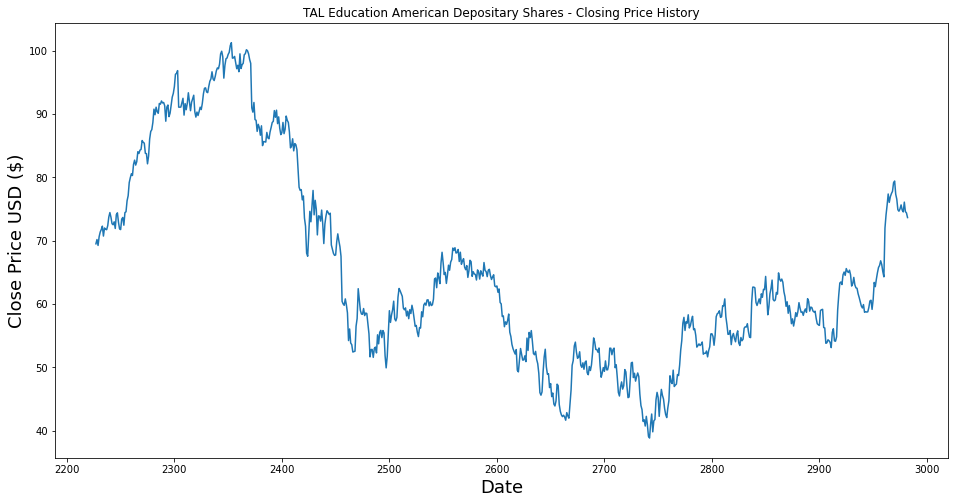

In [47]:
ut.plot_closing_price_history(df_stock_market['Close'], company_name)

### II.2.2. Exponential Moving Average (EMA)
We should also take a look on the EMA.

In [48]:
# calculate  EMA for the last 60 days
df_stock_market['EMA_60'] = df_stock_market.iloc[:,3].ewm(span=60,adjust=False).mean()

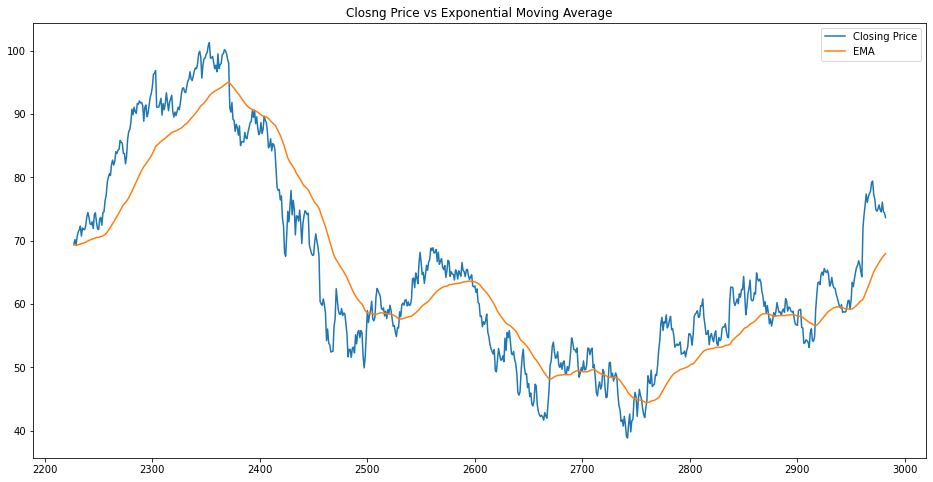

In [49]:
# plot closing price and moving average
ut.plot_closing_price_and_EMA(df_stock_market['Close'], df_stock_market['EMA_60'])

# III. Preparing data for LSTM

**1. Converting the data into array.**

In [50]:
# Create a new dataframe with only the 'Close' column
data = df_stock_market.filter(['Close'])
# converting the dataframe to a numpy array
dataset = data.values

**2. Scaling the data.**

In [51]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

**3. creating train & test data**

The train and test sets are going to contain moving values. 

**training set**: the past 60 day closing price values<br>
**test_set**: closing price on the 61st day 

We should store the training data length into a separate variable as we are not neccesseraly 
have data for each day and we are going to need this later for plotting the results.

In [52]:
training_data_len, x_train, y_train, x_test, y_test = ut.create_train_test_split(.8, 60, dataset, scaled_data)    

**4. preparing data sets for LSTM**

LSTM is expecting a 3D dataset in the following format: [number of samples, number of time steps, and number of features]


In [53]:
# creating 3D arrays from train and test
x_train, y_train = ut.create_3D_arrays(x_train, y_train)
x_test, y_test = ut.create_3D_arrays(x_test, y_test)


# IV. Modelling
Create the predicitve model using LSTM.

In [54]:
# build the LSTM  model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [55]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# V. Prediction

In [ ]:
# Getting the model's predicted stock prices
predictions = model.predict(x_test)
# undo the scaling, so we can see the real prices, not the normalized ones
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Calculate RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

In [ ]:
ut.plot_result(data, training_data_len, predictions)